# Cleaning Star Wars Survey

This project involves cleaning and exploring the data set provided by [FiveThirtyEight](http://fivethirtyeight.com/). It contains 1,186 total responses from Star Wars fans, asking questions about the movie franchise. In particular, they wondered: *Is "The Empire Strikes Back" the best Star Wars movie?* The data was collected via the online tool SurveyMonkey and can be found in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Overview

In [1]:
# Import the necessary libraries needed for the data cleaning
import numpy as np
import pandas as pd
# Need specific encoding to read the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
# Displays the first ten rows of data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
# Prints the names of all the columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

From the data above we can see some of the questions included:

| Column                                                          | Description |
|:-----------------------------------------------------------------------|:-------------------------------------|
| RespondentID                                                          | An anonymized ID for the respondent |
| Have you seen any of the 6 films in the Star Wars franchise?          | Has a Yes or No response            |
| Do you consider yourself to be a fan of the Star Wars film franchise? | Has a Yes or No response            |
| Gender                                                                | Respondent's gender                 |
| Age                                                                   | Respondent's age                    |
| Household Income                                                      | Respondent's income                 |
| Household Income                                                      | Respondent's education level        |
| Location (Census Region)                                              | Respondent's location               |

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. Because that type of data is difficult to represent in a tabular format, this data set requires some cleaning. 

We'll start off by removing the rows that have null values in the RespondentID column. 

In [3]:
star_wars.shape

(1187, 38)

In [4]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.shape

(1186, 38)

## Cleaning and Mapping Yes/No Columns

We see that only one row was affected. Next we'll check how many non-null values are in the next two columns. Both represent Yes and No questions. To make the data easier to analyze down the road, we convert each column to a Boolean having only the values of **True**, **False**, and **NaN**.

In [5]:
# Before
star_wars.iloc[:, 1:3].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,Yes,Yes
2,No,NaN
3,Yes,No
4,Yes,Yes
5,Yes,Yes


In [6]:
# changing 'Yes' to True and 'No' to False
yes_no = {"Yes": True, "No": False } 
star_wars.iloc[:, 1] = star_wars.iloc[:, 1].map(yes_no)
star_wars.iloc[:, 2] = star_wars.iloc[:, 2].map(yes_no)

In [7]:
# After
star_wars.iloc[:, 1:3].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


## Cleaning and Mapping Checkbox Columns

The next six columns represents a single checkbox question. The respondent checked off a series of boxes in response to the question, *Which of the following Star Wars films have you seen? Please select allt hat apply*.

| Column                                                                              | Description                                                                    |
|:-------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------|
| Which of the following Star Wars films have you seen? Please select all that apply. | Whether or not the respondent saw Star Wars: Episode I The Phantom Menace      |
| Unnamed: 4                                                                          | Whether or not the respondent saw Star Wars: Episode II Attack of the Clones   |
| Unnamed: 5                                                                          | Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith   |
| Unnamed: 6                                                                          | Whether or not the respondent saw Star Wars: Episode IV A New Hope             |
| Unnamed: 7                                                                          | Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back |
| Unnamed: 8                                                                          | Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi     |

For each of these columns, if there is a NaN value, that means the respondent did not see the movie. Otherwise if it contains a value, then it means the respondent has seen the movie. 

We'll convert each of these columns to a Boolean using the same technique we used previously, and then rename the column something more intuitive.

In [8]:
# Before
star_wars.iloc[:,3:9].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
6,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
7,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
8,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
9,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
10,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN


In [9]:
# The first row of data includes values for all columns, 
# so will save them in a list to avoid spacing issues.
responses = star_wars.iloc[0,3:9].tolist()

In [10]:
# Save the column names into a list as well.
# Then will 'zip' the two list together to form a dictionary.

columns = star_wars.iloc[:,3:9].columns.tolist()
d = dict(zip(columns, responses)) 

for column, response in d.items(): # loop through the dictionary
    
    yes_no = {response: True, np.NaN: False } 
    star_wars[column] = star_wars[column].map(yes_no)

In [11]:
# After
star_wars.iloc[:,3:9].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


For the renaming, we'll use *seen_1* to indicate whether the respondent saw *Star Wars: Episode I The Phantom Menace*, *seen_2* for *Star Wars: Episode II Attack of the Clones*, and so on.

In [12]:
# Use the enumerate() function to loop over column names while using 
# generated index provided to help form the new column name.
for index, column in enumerate(columns):
    
    star_wars = star_wars.rename(columns={
                column : "seen_{}".format(1+index)
                })

In [13]:
# Prints the new column names
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

## Cleaning the Ranking Columns

The following six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite, 1 being the most favorite and 6 being the least favorite. Each columns can contain a value of 1, 2, 3, 4, 5, 6, or NaN. 

| Column                                                                                                                                        | Description                                                                |
|:-----------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------|
| Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. | How much the respondent liked Star Wars: Episode I The Phantom Menace      |
| Unnamed: 10                                                                                                                                   | How much the respondent liked Star Wars: Episode II Attack of the Clones   |
| Unnamed: 11                                                                                                                                   | How much the respondent liked Star Wars: Episode III Revenge of the Sith   |
| Unnamed: 12                                                                                                                                   | How much the respondent liked Star Wars: Episode IV A New Hope             |
| Unnamed: 13                                                                                                                                   | How much the respondent liked Star Wars: Episode V The Empire Strikes Back |
| Unnamed: 14                                                                                                                                   | How much the respondent liked Star Wars: Episode VI Return of the Jedi     |

We'll convert each column to a numeric type, and then rename the columns.

In [14]:
# Convert the columns to a float type
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float) 

In [15]:
# Save the column names to a list
columns = star_wars.iloc[:,9:15].columns.tolist()

# Use the enumerate() function again to assist in the name change.
for index, column in enumerate(columns):
    
    star_wars = star_wars.rename(columns={
                column : "ranking_{}".format(1+index)
                })

In [16]:
star_wars.iloc[:,9:15].columns

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## Finding the Highest-Ranked Movie

After cleaning up the ranking columns, we can now find the highest-ranked movie more quickly. We only use data of those who have watched all six movies to be fair and store that in a new dataset called *sw*.

In [17]:
# Import necessary library for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

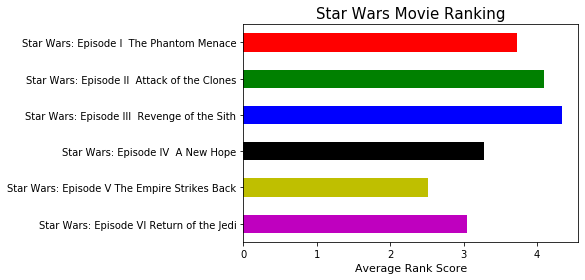

In [18]:
# bar plot based on average ranking score
my_colors = ['r', 'g', 'b', 'k', 'y', 'm']
star_wars.iloc[:,9:15].mean().plot(kind='barh', color=my_colors);
    
plt.title("Star Wars Movie Ranking", fontsize=15)
plt.xlabel('Average Rank Score', fontsize=11)
plt.yticks(np.arange(6), responses)
plt.gca().invert_yaxis()

Because the ranking was from 1 being the most favorite and 6 being the least favorite, the movie with the lowest rank score would be the most favorite. Based on the graph above, the most favorite would be **Star Wars: The Empire Strikes Back**.

## Finding the Most Viewed Movie

Next we'll find out which Star Wars movie was the most viewed. Pandas' *sum()* method treats Boolean values like integers, that means True equals 1, and False equals 0. So that means we can sum the individual "seen" columns.

In [19]:
star_wars.iloc[:,3:9].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

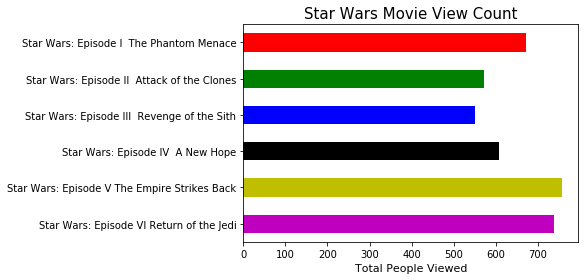

In [20]:
# Create bar plot based on total count previously shown.
my_colors = ['r', 'g', 'b', 'k', 'y', 'm']
star_wars.iloc[:,3:9].sum().plot(kind='barh', color=my_colors);
    
plt.title("Star Wars Movie View Count", fontsize=15)
plt.xlabel('Total People Viewed', fontsize=11)
plt.yticks(np.arange(6), responses)
plt.gca().invert_yaxis()

Based on the chart above, we see that **Star Wars: The Empire Strikes Back** is the most viewed movie. There appears to be a relationship between the two charts. 

In [21]:
# Store the data from the two results in separate variables
s1= star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']].sum()
s2 = star_wars[['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6']].mean() 
# Title each row to the corresponding movie titles
s1.index = responses
s2.index = responses

In [22]:
# Merge the data together with the appropriate column titles
s3 = pd.concat([s1, s2], axis=1)
s3.columns = ["Seen", "Ranking"]

In [23]:
s3.corr()

,Seen,Ranking
Seen,1.000000,-0.878126
Ranking,-0.878126,1.000000


The correlation table above shows there is a strong relationship between the amount of views and ranking score. The more people favors a Star Wars movie, the more views that movie receives. 

## Exploring the Data by Gender

We know which movie the general public has ranked the highest. Now let's examine how the survey population by gender responded.

In [24]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

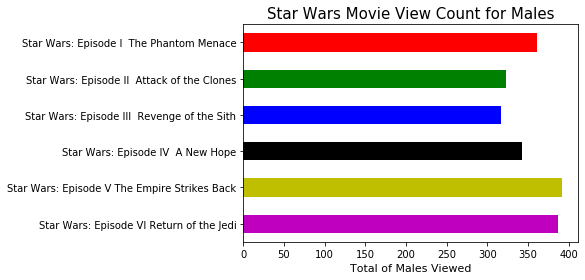

In [25]:
# bar plot based on total count
my_colors = ['r', 'g', 'b', 'k', 'y', 'm']
males.iloc[:,3:9].sum().plot(kind='barh', color=my_colors);
    
plt.title("Star Wars Movie View Count for Males", fontsize=15)
plt.xlabel('Total of Males Viewed', fontsize=11)
plt.yticks(np.arange(6), responses)
plt.gca().invert_yaxis()

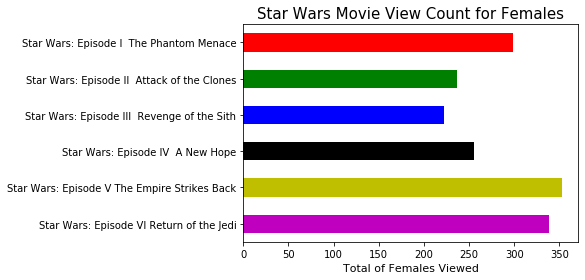

In [26]:
# bar plot based on total count
my_colors = ['r', 'g', 'b', 'k', 'y', 'm']
females.iloc[:,3:9].sum().plot(kind='barh', color=my_colors);
    
plt.title("Star Wars Movie View Count for Females", fontsize=15)
plt.xlabel('Total of Females Viewed', fontsize=11)
plt.yticks(np.arange(6), responses)
plt.gca().invert_yaxis()

The two graphs shows that males watch more Star Wars movies than females. I believe that makes sense since males like action movies more than females. Between the two charts, the **Star Wars: The Empire Strikes Back** is still the most viewed movie from both groups. Next we'll explore the rankings for each gender, again for the rankings.

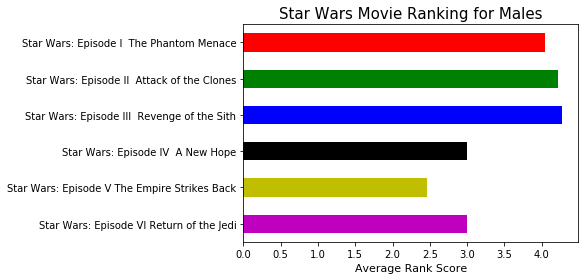

In [27]:
# bar plot based on average ranking score
my_colors = ['r', 'g', 'b', 'k', 'y', 'm']
males.iloc[:,9:15].mean().plot(kind='barh', color=my_colors);
    
plt.title("Star Wars Movie Ranking for Males", fontsize=15)
plt.xlabel('Average Rank Score', fontsize=11)
plt.yticks(np.arange(6), responses)
plt.gca().invert_yaxis()

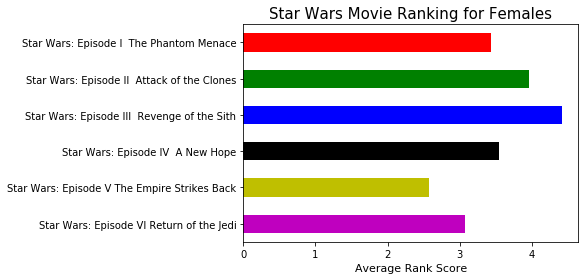

In [28]:
# bar plot based on average ranking score
my_colors = ['r', 'g', 'b', 'k', 'y', 'm']
females.iloc[:,9:15].mean().plot(kind='barh', color=my_colors);
    
plt.title("Star Wars Movie Ranking for Females", fontsize=15)
plt.xlabel('Average Rank Score', fontsize=11)
plt.yticks(np.arange(6), responses)
plt.gca().invert_yaxis()

The two charts shows that **Star Wars: The Empire Strikes Back** is the most favorite movie, regardless of gender. Interestingly, more males watches episodes 1-3, but males liked them far less than females did.

## Conclusion

This concludes our analysis of the data set, answering the question, *Is "The Empire Strikes Back" the best Star Wars movie?* We can confidently say, "Yes, *Star Wars: The Empire Strikes Back* is the most favorite movie among viewers". 